In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/hp/OneDrive/Desktop/DSA Internship/car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
data['Year'].nunique()

8

In [5]:
data['Price'].nunique()

35

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Find the best linear relationship between year and price

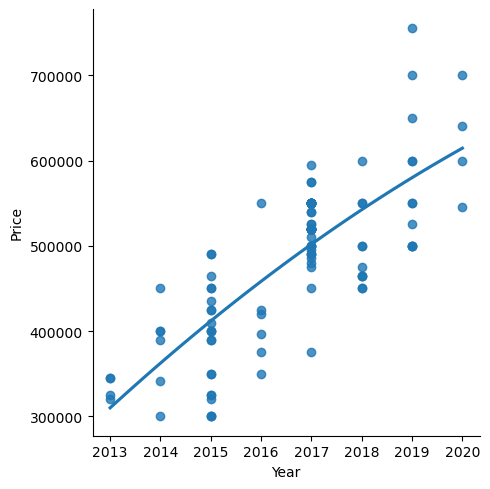

In [8]:
sns.lmplot(x="Year",y="Price",data=data,order=2,ci=None)

In [13]:
corr_matrix= data.corr()

In [21]:
sns.heatmap(corr_matrix,annot= True,cmap='YlGnBu')
plt.plot()

[]

In [23]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [24]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [25]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.25)

In [27]:
x_train.head()

,Year
81,2014
77,2015
15,2017
30,2019
45,2018


In [29]:
x_test.head()

,Year
40,2019
65,2017
4,2018
47,2018
42,2018


In [30]:
#linear regression:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(x_test)

In [31]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': predictions.squeeze()})
print(df_preds)

     Actual      Predicted
40   525000  599223.073041
65   495000  505265.042150
4    465000  552244.057595
47   450000  552244.057595
42   550000  552244.057595
69   300000  411307.011259
26   550000  505265.042150
11   500000  552244.057595
10   500000  599223.073041
44   550000  599223.073041
73   320000  317348.980368
55   550000  505265.042150
68   465000  411307.011259
97   640000  646202.088487
0    465000  552244.057595
18   500000  599223.073041
53   345000  317348.980368
80   390000  411307.011259
103  375000  505265.042150
91   520000  505265.042150
36   550000  505265.042150
12   500000  505265.042150
31   550000  505265.042150
66   525000  505265.042150
90   520000  505265.042150
62   540000  505265.042150
22   434999  411307.011259
85   320000  411307.011259


In [32]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error =", mean_squared_error(y_test,predictions))
print('R squared Value =', r2_score(y_test,predictions))

Mean Squared Error = 3878767151.073449
R squared Value = 0.4347961632108023


In [33]:
#Lasso Regression:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_test_lasso = model_lasso.predict(x_test)
print("Mean Squared Error =",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R squared Value =',r2_score(y_test, pred_test_lasso))

Mean Squared Error = 62279.74661573118
R squared Value = 0.43479620875532277


# Lasso is performing better as it has least Mean squared error value than linear regression

# Can you predict the possible price of a 2022 model second-hand grand i10?

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[740160.11937766]


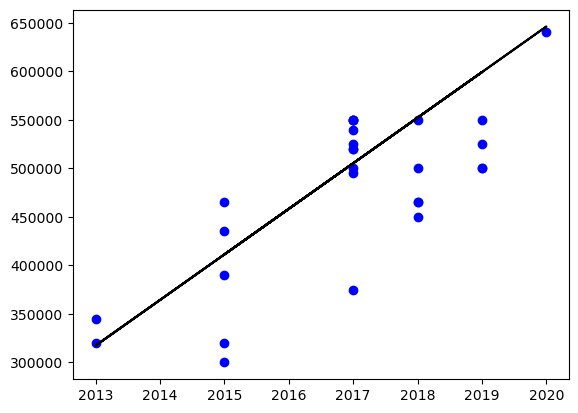

In [36]:
price = linear_regression.predict([[2022]])
print(price)
y_pred = linear_regression.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
plt.show()